# House Prices: Advanced Regression Techniques
- 81개의 변수 (36 + 43 + 1 + 1)
    - 36개의 연속형 데이터 
    - 43개의 범주형 데이터
    - ID(식별자) 
    - 최종적으로 예측할 SalePrice

In [1]:
df = pd.read_csv("train.csv")

In [2]:
df = df.rename({"1stFlrSF": "FstFlrSF",
           "2ndFlrSF": "SndFlrSF", 
           "3SsnPorch": "TSsnPorch"}, axis = "columns")

### 데이터 프레임 사이즈

In [3]:
df.shape

(1460, 81)

### 81개의 변수들

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FstFlrSF', 'SndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### MSSubClass (범주형? 이산형? 변수)
- 판매와 관련된 거주 유형을 식별한다.
        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

<IPython.core.display.Javascript object>


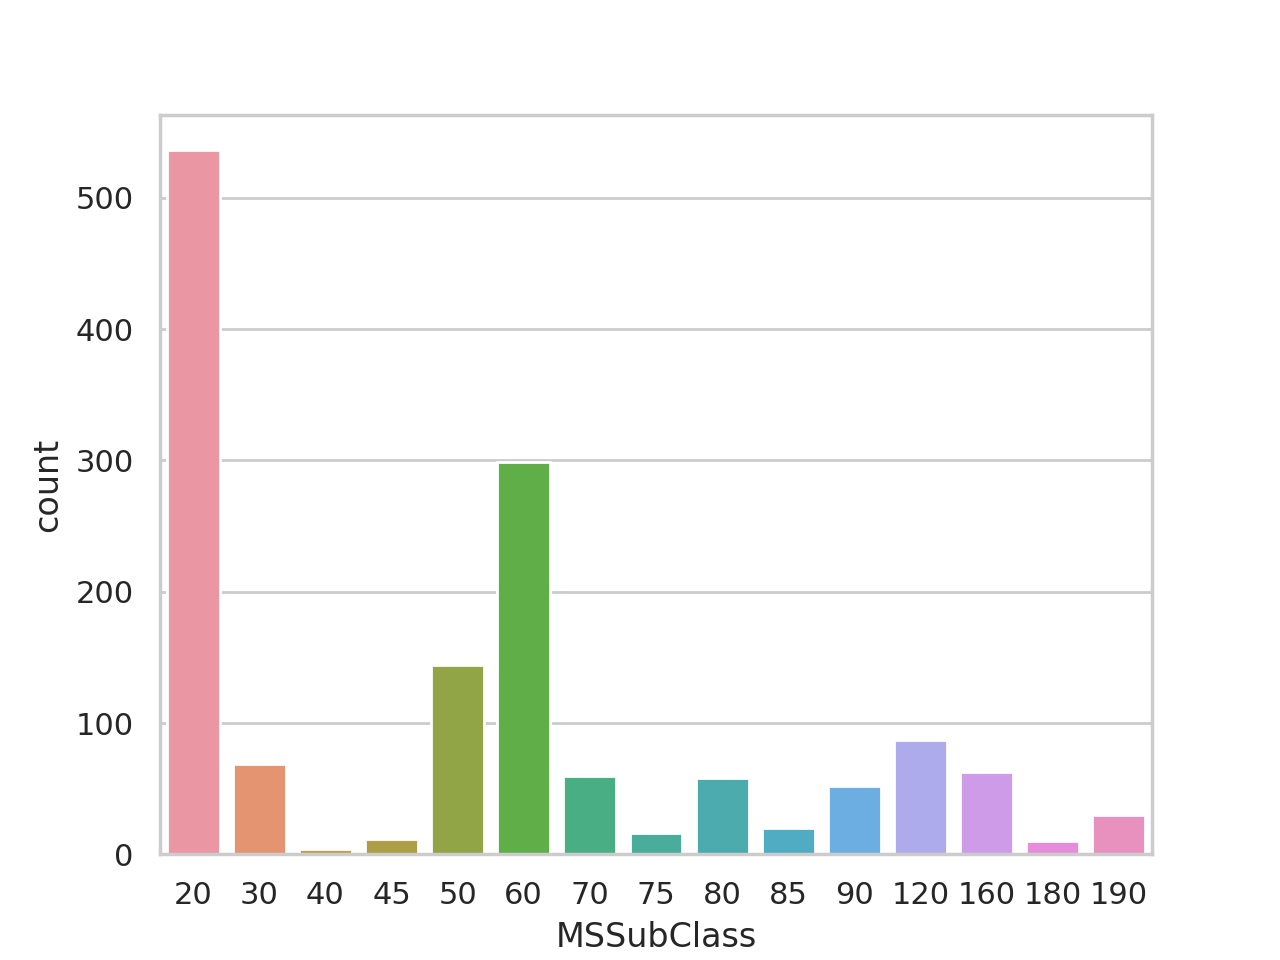

In [6]:
sns.countplot(df["MSSubClass"])

### MSZoning (범주형 변수)
- 판매와 관련된 구역 분류

       A	Agriculture (농업)
       C	Commercial (상업)
       FV	Floating Village Residential (수중 위에 있는 거주지역)
       I	Industrial (산업)
       RH	Residential High Density (높은 밀도의 주거지역)
       RL	Residential Low Density (낮은 밀도의 주거지역)
       RP	Residential Low Density Park (주거용 저밀도 공원)
       RM	Residential Medium Density (중간 정도 밀도의 주거지역)


<IPython.core.display.Javascript object>


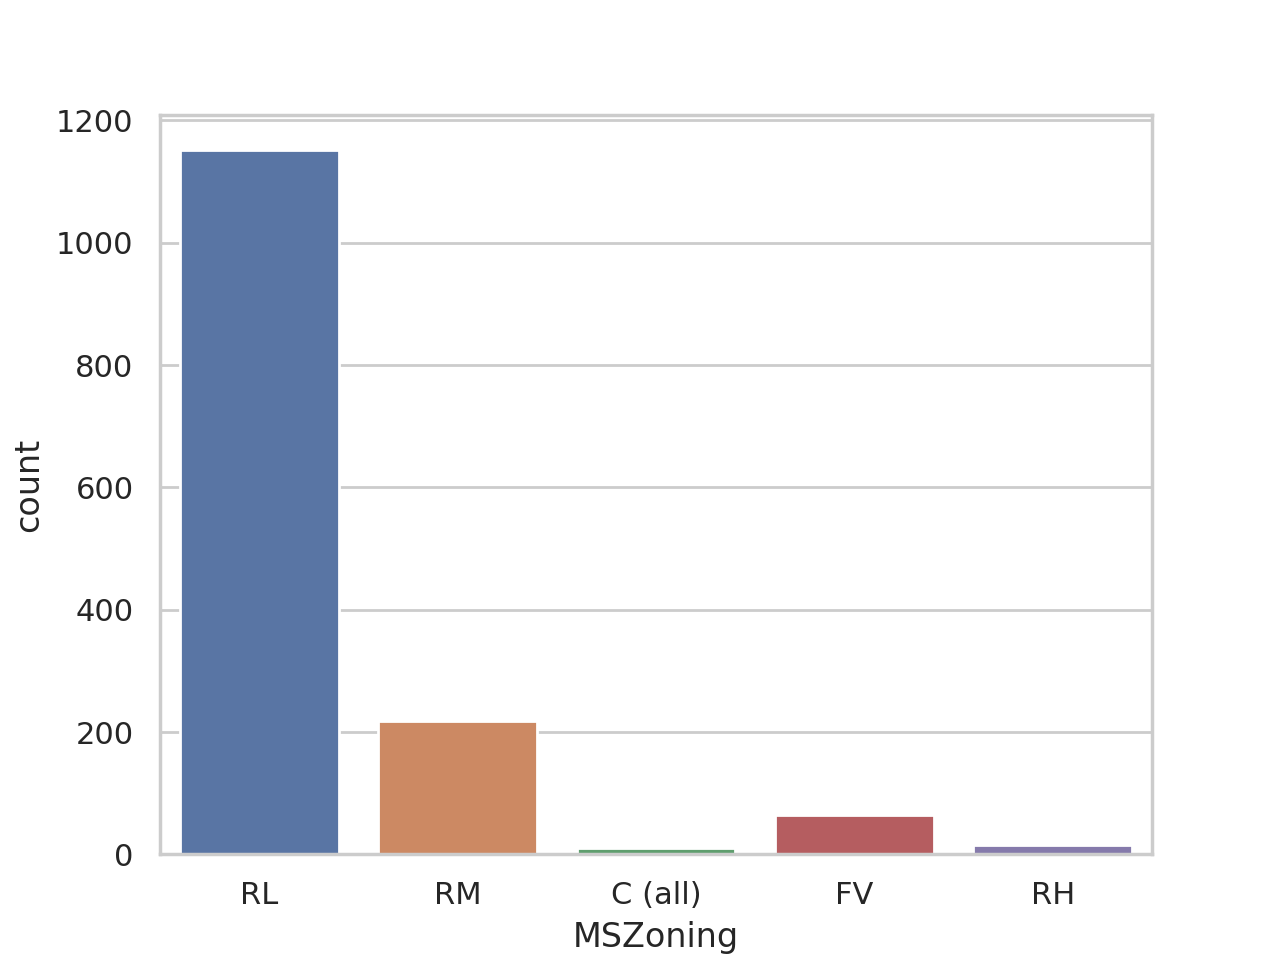

In [14]:
sns.countplot(df["MSZoning"])

### LotFrontage (연속형 변수)
- Linear feet of street connected to property
- 주거공간과 일반 도로 까지의 선형 거리

In [17]:
df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<IPython.core.display.Javascript object>


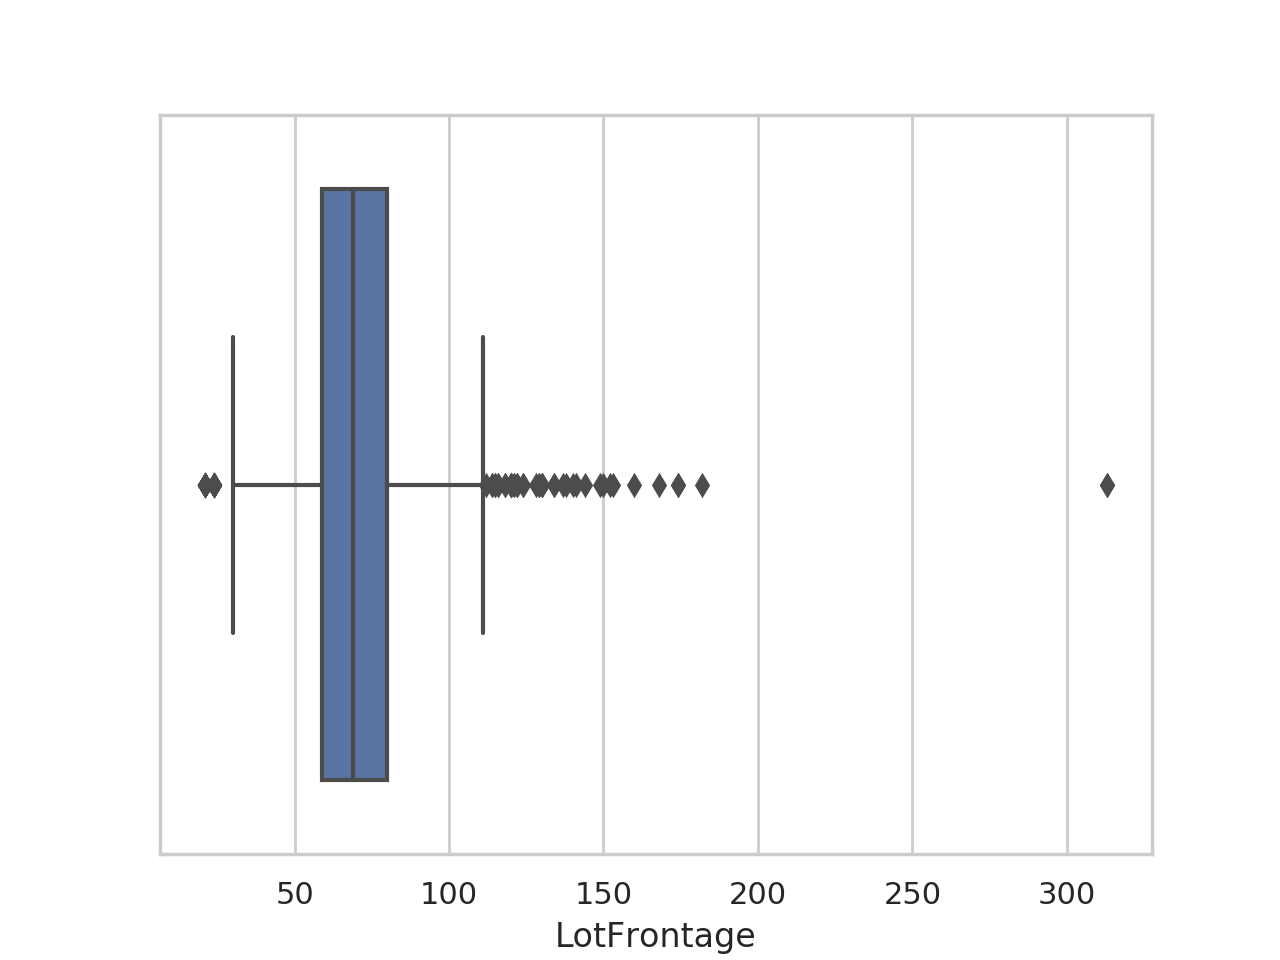

In [32]:
sns.boxplot(df["LotFrontage"])

In [ ]:
# df.fillna("0")

- 연속형 변수

In [1]:
str = "FstFlrSF, SndFlrSF, TSsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold"
str = str.split(",")

In [2]:
len(str)

36

In [3]:
for i in range(len(str)):
    str[i] = str[i].strip()
    
quan = " + ".join(str)

- 범주형 변수

In [2]:
str = "Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,"
str = str.split(",")
str = str[:-1]

In [4]:
len(str)

43

In [4]:
for i in range(len(str)):
    str[i] = "C(" + str[i].strip() + ")"

qual = " + ".join(str)

In [5]:
# x = "SalePrice ~ " + quan + " + " + qual
x = "SalePrice ~ " + quan
x

'SalePrice ~ FstFlrSF + SndFlrSF + TSsnPorch + BedroomAbvGr + BsmtFinSF1 + BsmtFinSF2 + BsmtFullBath + BsmtHalfBath + BsmtUnfSF + EnclosedPorch + Fireplaces + FullBath + GarageArea + GarageCars + GarageYrBlt + GrLivArea + HalfBath + KitchenAbvGr + LotArea + LotFrontage + LowQualFinSF + MSSubClass + MasVnrArea + MiscVal + MoSold + OpenPorchSF + OverallCond + OverallQual + PoolArea + ScreenPorch + TotRmsAbvGrd + TotalBsmtSF + WoodDeckSF + YearBuilt + YearRemodAdd + YrSold'

In [6]:
from statsmodels.formula.api import ols

fit = ols(x, data=df).fit() 

In [7]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     135.7
Date:                Fri, 26 Oct 2018   Prob (F-statistic):               0.00
Time:                        17:13:11   Log-Likelihood:                -13358.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1086   BIC:                         2.696e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.232e+05    1.7e+06     -0.190      0.849   -3.66e+06    3.01e+06
FstFlrSF         14.2255      8.463      1.681      0.093      -2.379      30.830
SndFlrSF         14.9934      7.705      1.946      0.052      -0.124      30.111
TSsnPorch        34.5789     37.493      0.922      0.357     -38.989     108.146
BedroomAbvGr  -1.023e+04   2154.041     -4.750      0.000   -1.45e+04   -6005.947
BsmtFinSF1        9.7001      3.127      3.102      0.002       3.564      15.837
BsmtFinSF2        0.6725      5.585      0.120      0.904     -10.285      11.630
BsmtFullBath   8979.9920   3193.902      2.812      0.005    2713.076    1.52e+04
BsmtHalfBath   2490.1194   5070.958      0.491      0.623   -7459.864    1.24e+04
BsmtUnfSF        -2.6835      2.935     -0.914      0.361      -8.443       3.076
EnclosedPorch     7.2332     20.613      0.351      0.726     -33.213      47.680
Fireplaces     4374.8147   2187.857      2.000      0.046      81.910    8667.720
FullBath       5389.6373   3528.522      1.527      0.127   -1533.855    1.23e+04
GarageArea        6.4882     12.114      0.536      0.592     -17.281      30.257
GarageCars     1.679e+04   3486.683      4.815      0.000    9947.003    2.36e+04
GarageYrBlt     -49.1431     90.933     -0.540      0.589    -227.568     129.282
GrLivArea        31.6863      7.753      4.087      0.000      16.473      46.900
HalfBath      -1118.5234   3319.871     -0.337      0.736   -7632.610    5395.563
KitchenAbvGr  -2.193e+04   6704.402     -3.271      0.001   -3.51e+04   -8776.230
LotArea           0.5454      0.157      3.466      0.001       0.237       0.854
LotFrontage    -116.1232     61.241     -1.896      0.058    -236.288       4.041
LowQualFinSF      2.4674     20.902      0.118      0.906     -38.546      43.481
MSSubClass     -200.4890     34.486     -5.814      0.000    -268.155    -132.822
MasVnrArea       31.6049      7.006      4.511      0.000      17.858      45.352
MiscVal          -3.8501      6.955     -0.554      0.580     -17.497       9.797
MoSold         -224.0209    422.673     -0.530      0.596   -1053.369     605.327
OpenPorchSF      -2.3153     19.478     -0.119      0.905     -40.534      35.904
OverallCond    5227.2069   1367.084      3.824      0.000    2544.781    7909.632
OverallQual     1.87e+04   1478.416     12.646      0.000    1.58e+04    2.16e+04
PoolArea        -61.2618     29.842     -2.053      0.040    -119.817      -2.707
ScreenPorch      57.9661     20.399      2.842      0.005      17.941      97.991
TotRmsAbvGrd   5439.7807   1485.776      3.661      0.000    2524.464    8355.097
TotalBsmtSF       7.6891      4.221      1.822      0.069      -0.593      15.971
WoodDeckSF       21.5457     10.018      2.151      0.032       1.890      41.202
YearBuilt       316.9684     87.622      3.617   

In [12]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<IPython.core.display.Javascript object>


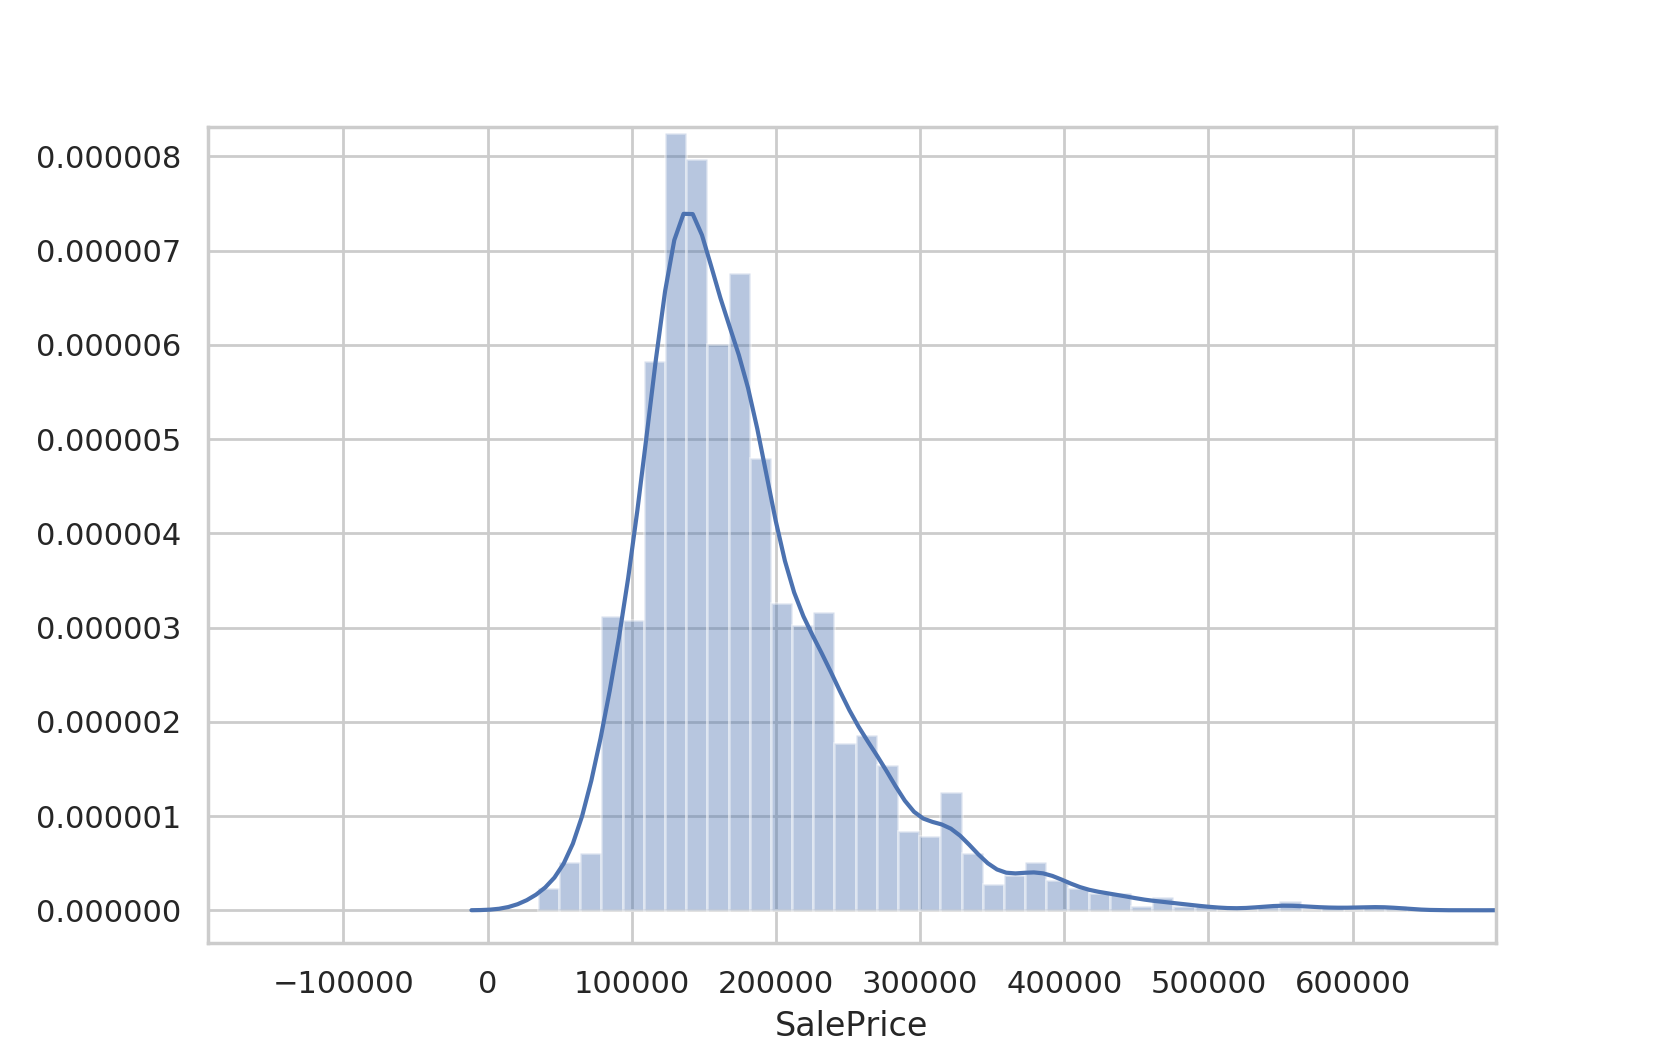

In [15]:
sns.distplot(df['SalePrice'])

<IPython.core.display.Javascript object>


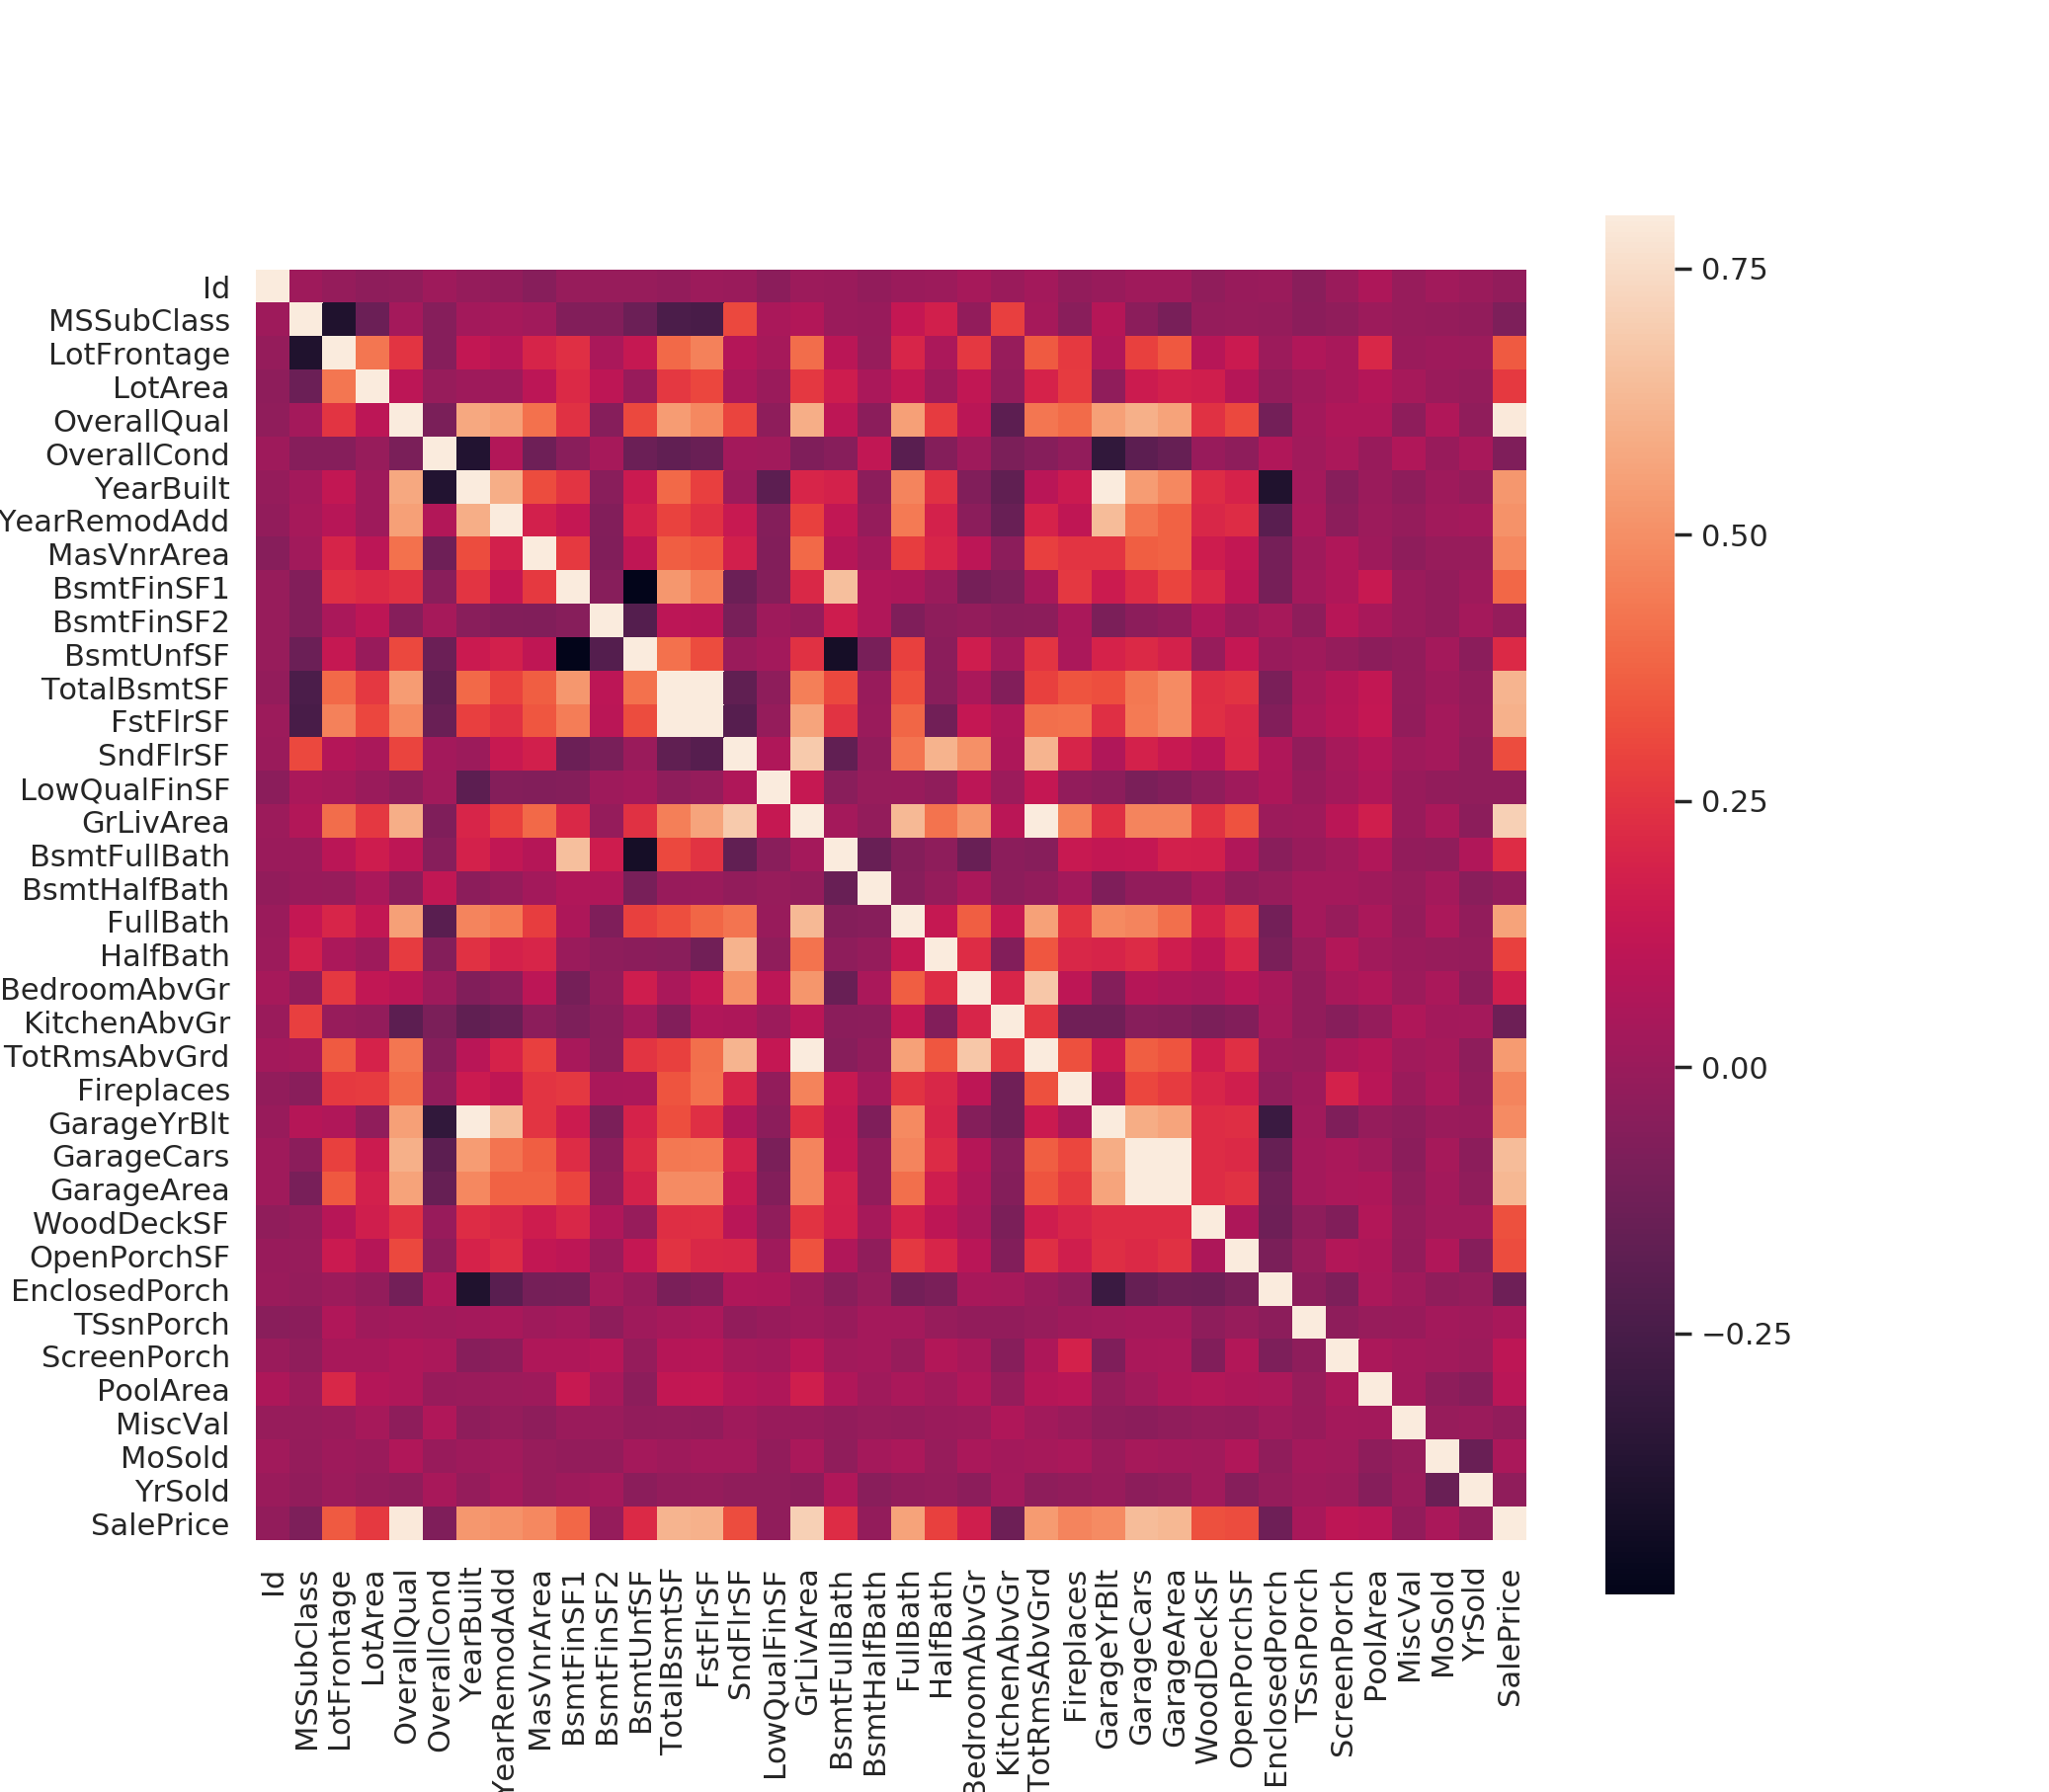

In [16]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# NaN값 알아보기

In [22]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

<IPython.core.display.Javascript object>


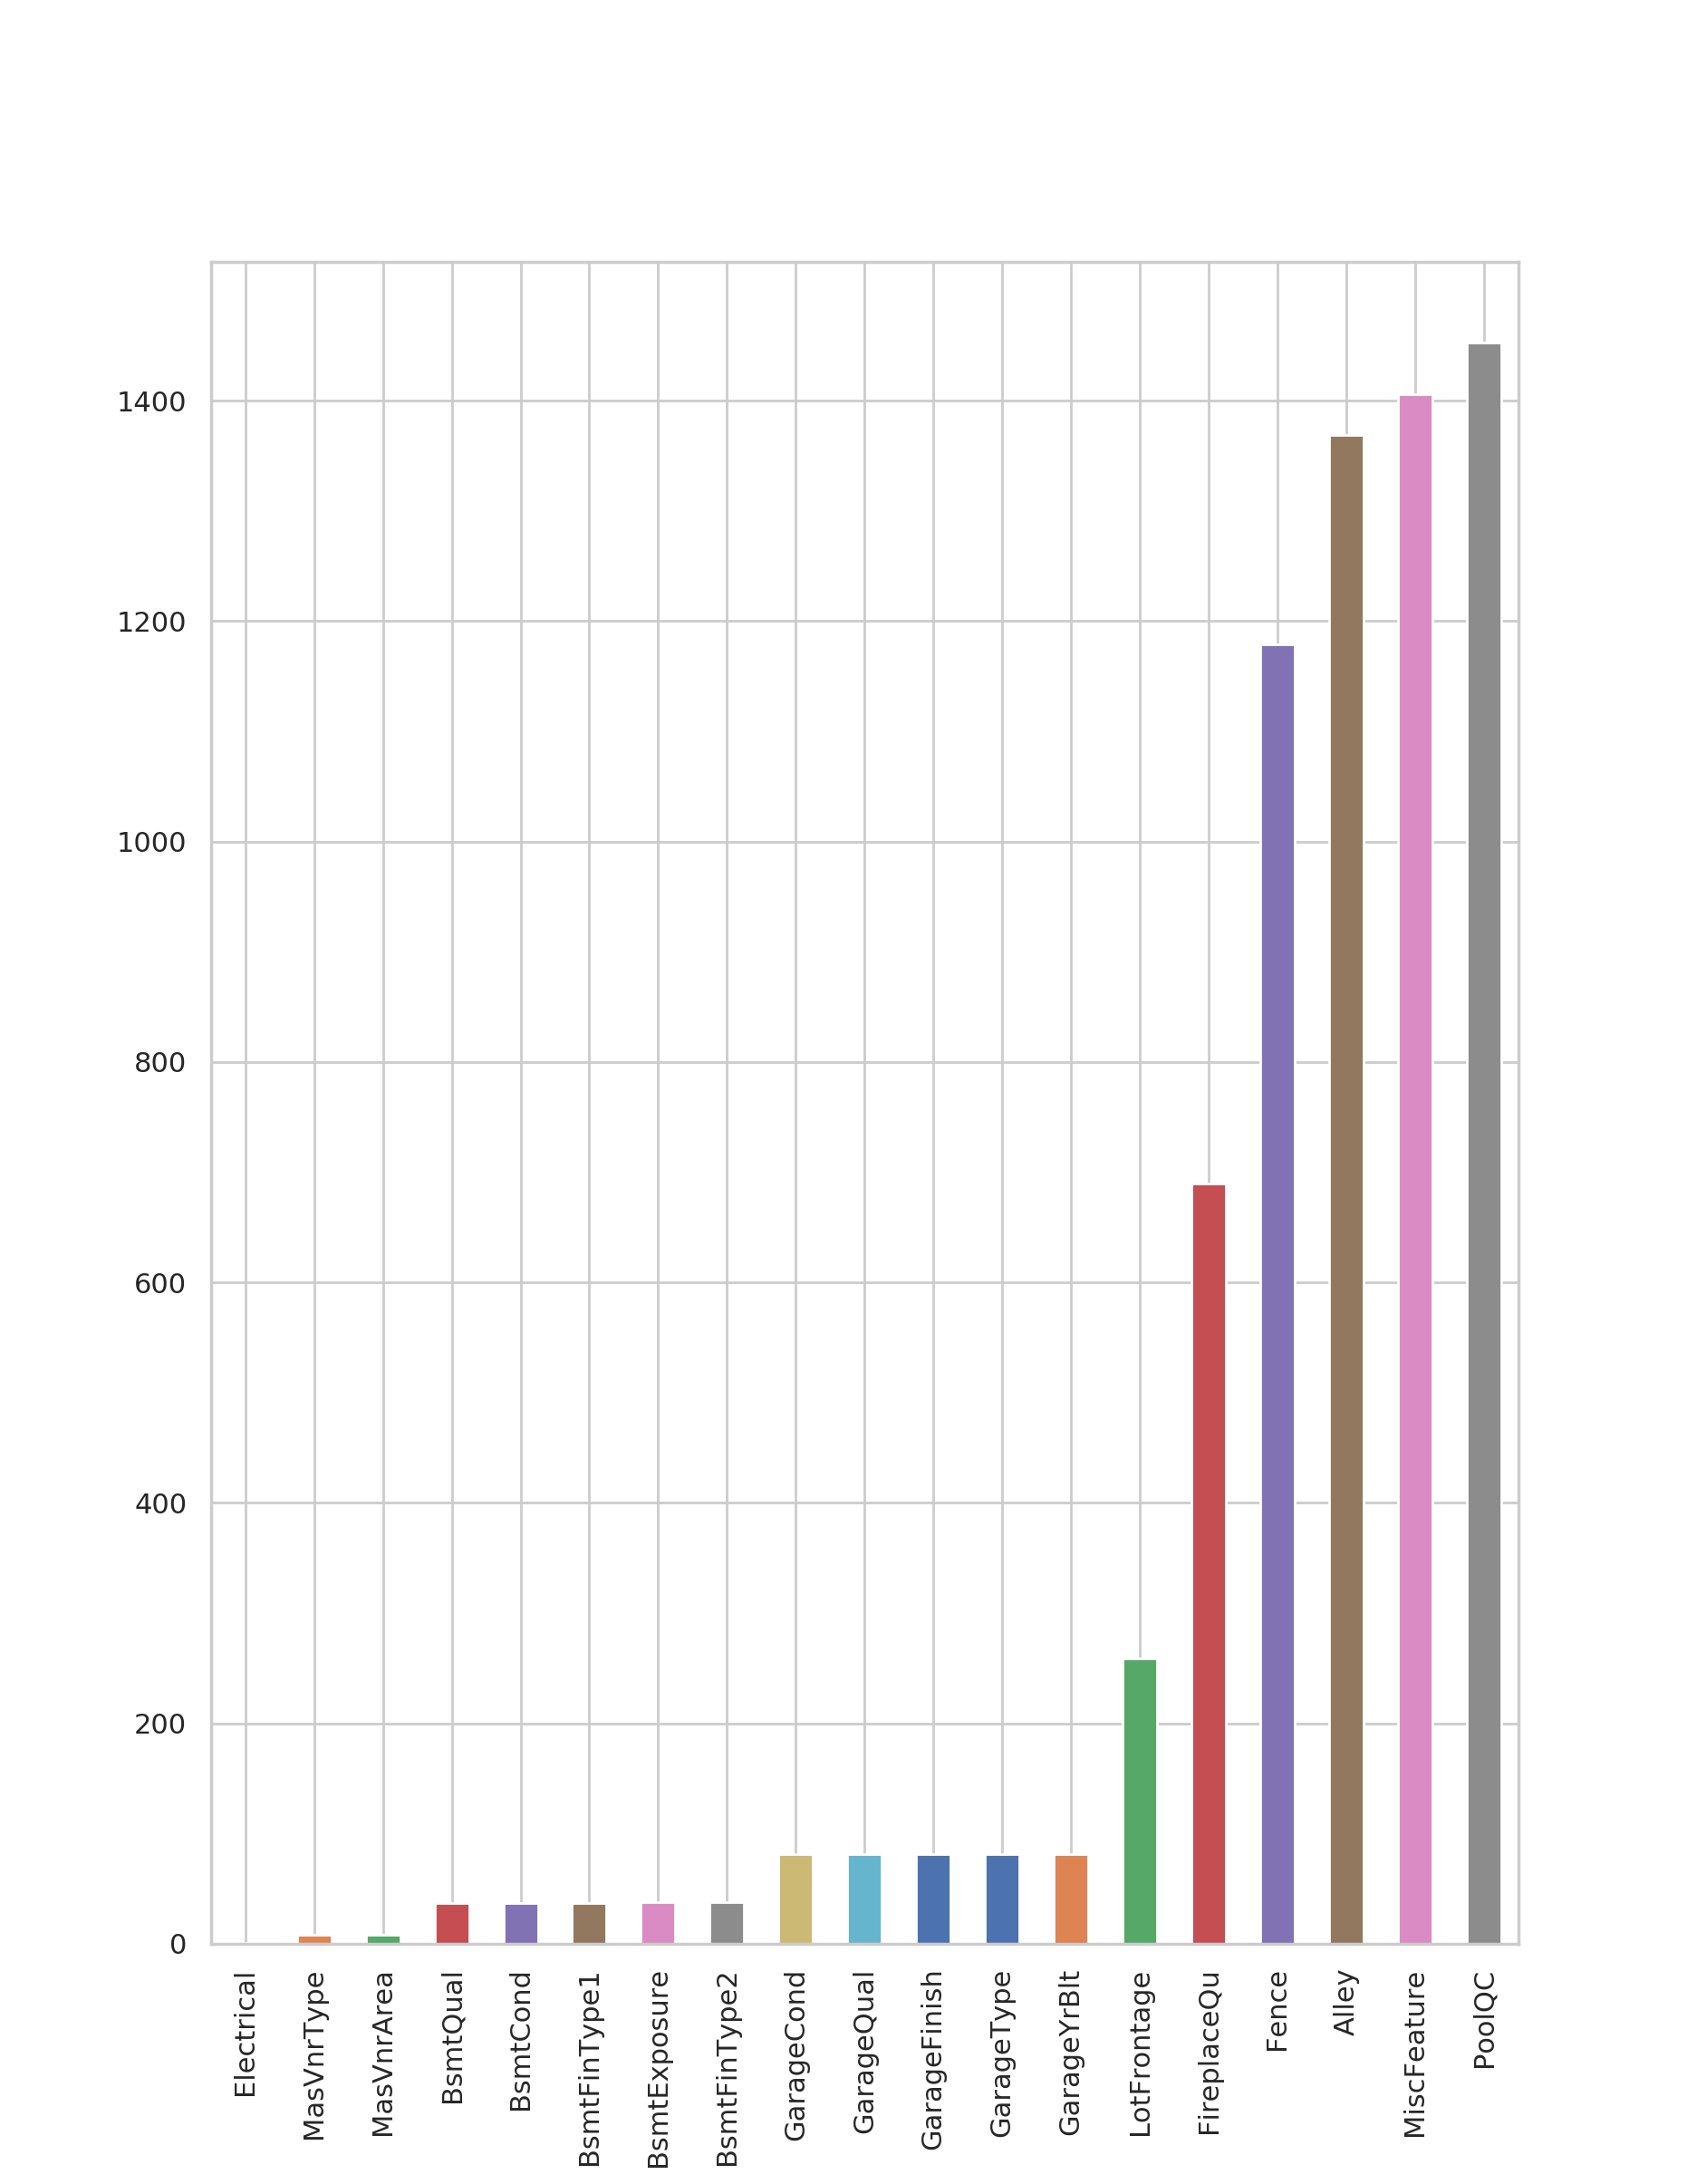

In [21]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

# 범주형 데이터 분석

- Category 변수 값, plot 그리는 함수

In [1]:
df = pd.read_csv("train.csv")

In [2]:
df = df.rename({"1stFlrSF": "FstFlrSF",
           "2ndFlrSF": "SndFlrSF", 
           "3SsnPorch": "TSsnPorch"}, axis = "columns")

In [149]:
def analysis(variable_name):
    name = variable_name
    variable_ls = list(df.groupby(name).size().index)
    variable = df[name].astype('category')
    if variable.isnull().sum():
        variable_ls.append('NaN')
        variable = variable.cat.set_categories(variable_ls)
        variable = variable.fillna('NaN')
    else:
        variable = variable.cat.set_categories(variable_ls)
    result = variable.value_counts()
    print(result)
    result.plot.bar()

### Alley
- 집까지의 골목길 유형
        Grvl: 자갈
        Pave: 포장길
        NA: 골목길이 없다.

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


<IPython.core.display.Javascript object>


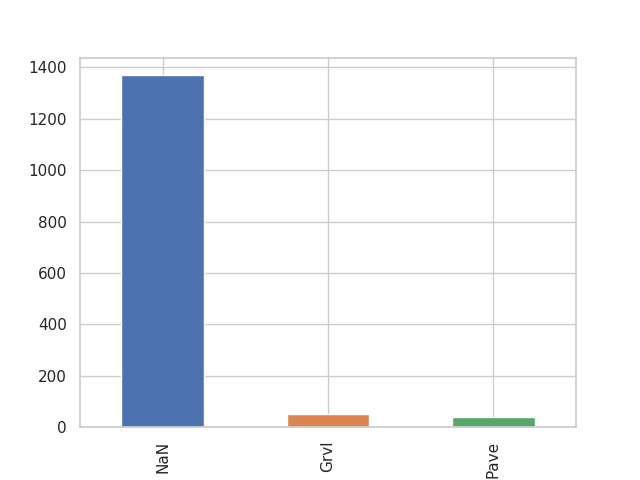

In [150]:
analysis('Alley')

### BldgType
- Type of dwelling 주거의 형태
       1Fam	Single-family Detached (단독 주택 분리됨)
       2FmCon	Two-family Conversion; originally built as one-family dwelling (원래 한 가족으로 지어졌지만, 두 가족으로 분리됨)
       Duplx	Duplex (복층아파트, 두 세대용 건물)
       TwnhsE	Townhouse End Unit (타운하우스 끝자락)
       TwnhsI	Townhouse Inside Unit (타운하우스 중심가)

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


<IPython.core.display.Javascript object>


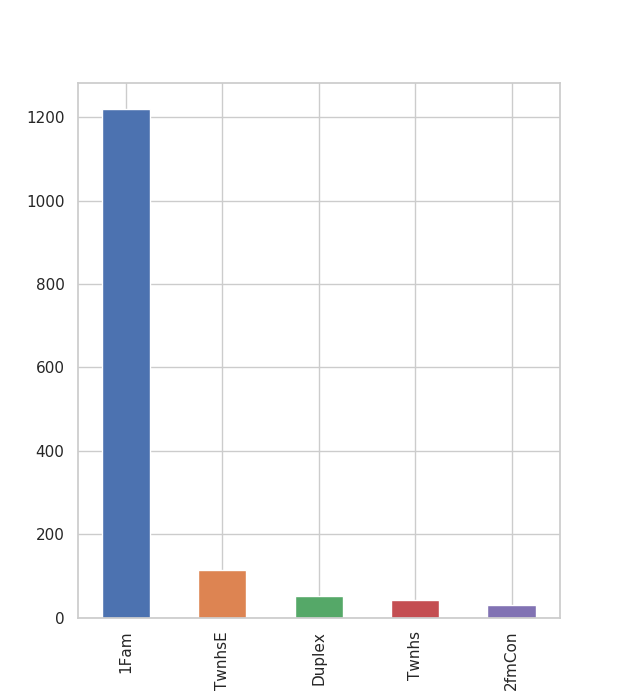

In [152]:
analysis("BldgType")

### BsmtCond
- Evaluates the general condition of the basement
- 지하실의 상태
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64


<IPython.core.display.Javascript object>


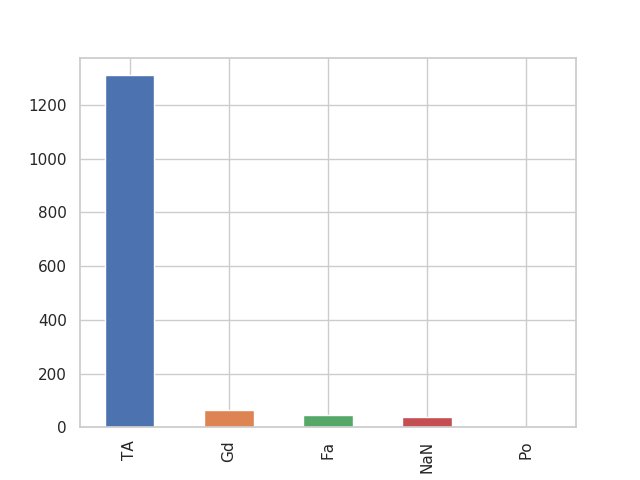

In [153]:
analysis('BsmtCond')

### BsmtExposure
- 외부로 연결된 지하실 안의 통로
       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64


<IPython.core.display.Javascript object>


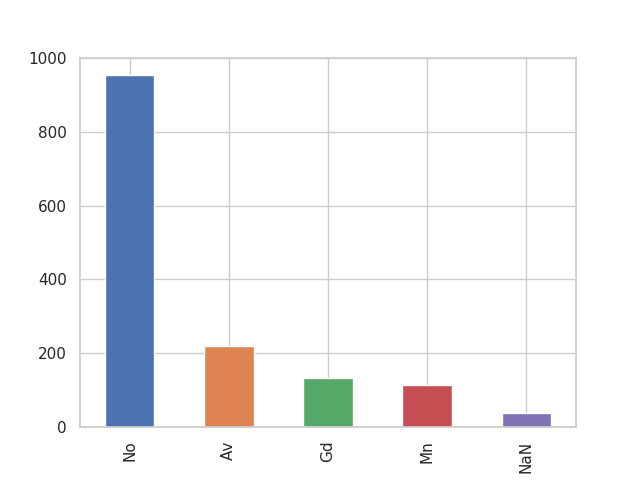

In [154]:
analysis('BsmtExposure')

### BsmtFinType1
- Rating of basement finished area
- 지하실 지대 완공 상태
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64


<IPython.core.display.Javascript object>


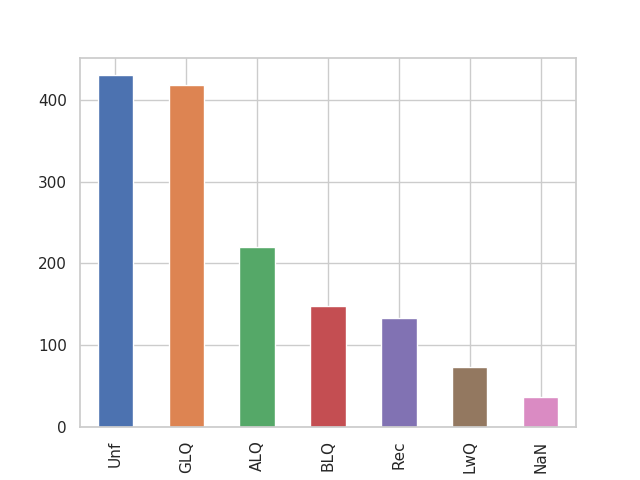

In [155]:
analysis('BsmtFinType1')

### BsmtFinType2
- Rating of basement finished area (if multiple types)
- 두가지 이상이면? 뭐에 관련된 변수인지 정확하게 모르겠다.
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


<IPython.core.display.Javascript object>


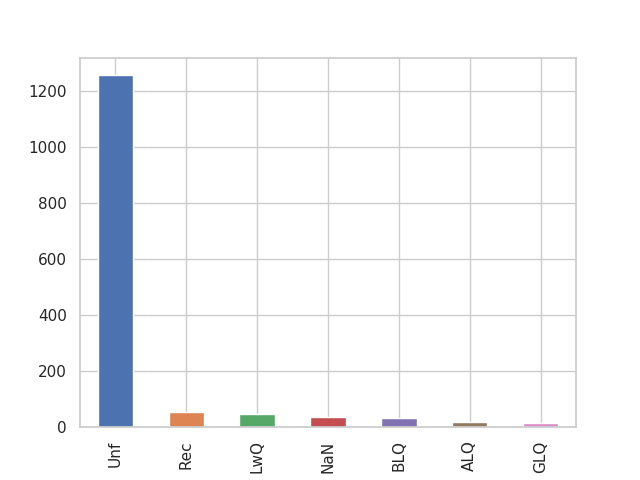

In [156]:
analysis('BsmtFinType2')

### BsmtQual
- Evaluates the height of the basement
- 지하실 높이
       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64


<IPython.core.display.Javascript object>


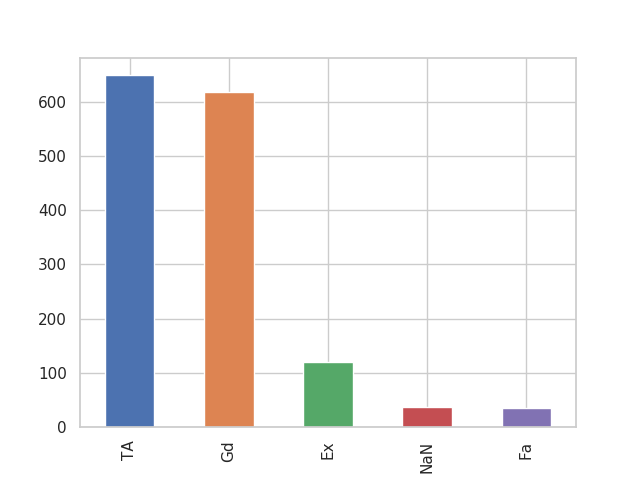

In [157]:
analysis('BsmtQual')

### LotShape
- 일반적인 토지 모양
       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [101]:
lotshape = df['LotShape']
lotshape = lotshape.astype('category')
lotshape = lotshape.cat.set_categories(['Reg', 'IR1' ,'IR2', 'IR3'])
lotshape_result = lotshape.value_counts()

<IPython.core.display.Javascript object>


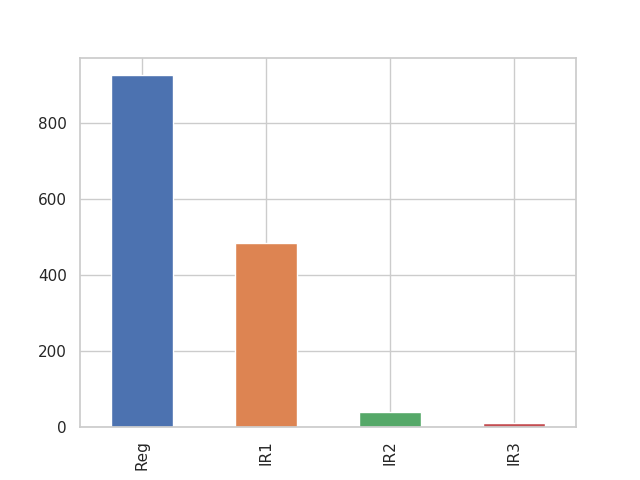

In [103]:
lotshape_result.plot.bar()

### LandContour
- 토지가 평평한지
       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building(거리에서 건물까지 빠르게 올라갈 수 있다)
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [107]:
landcontour = df['LandContour']
landcontour = landcontour.astype('category')
landcontour = landcontour.cat.set_categories(['Lvl', 'Bnk' ,'HLS', 'Low'])
landcontour_result = landcontour.value_counts()
landcontour_result

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

<IPython.core.display.Javascript object>


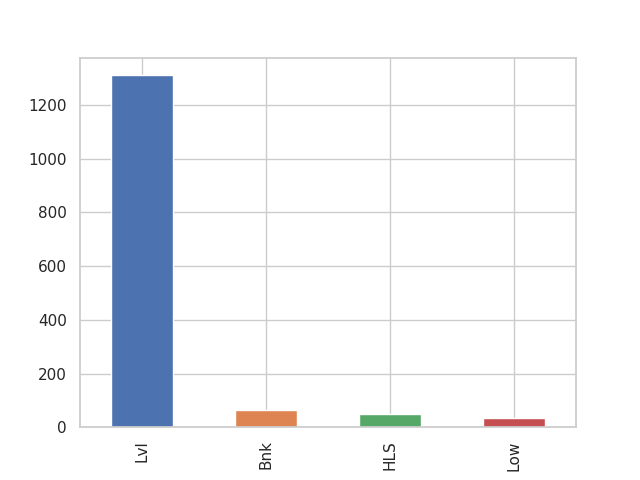

In [106]:
landcontour_result.plot.bar()